In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('Data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df= df.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)

In [8]:
misVal= list()
for col in df.columns:
    if df[col].isna().sum() > 0:
        misVal.append(col)

In [9]:
df[misVal].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [10]:
missing_Obj= df[misVal].select_dtypes(include= 'object')

In [11]:
missing_Num= df[misVal].select_dtypes(include= 'float')

In [12]:
missing_Obj.isna().sum()

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
missing_Num.isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
df[missing_Num.columns]= df[missing_Num.columns].fillna(df[missing_Num.columns].mean())

In [15]:
df[missing_Obj.columns]= df[missing_Obj.columns].fillna('none')

In [16]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [17]:
object_Val= df.select_dtypes(include= 'object').columns

In [18]:
for val in object_Val:
    print(val,': ',df[val].unique(), '\n')

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street :  ['Pave' 'Grvl'] 

LotShape :  ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities :  ['AllPub' 'NoSeWa'] 

LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope :  ['Gtl' 'Mod' 'Sev'] 

Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 '

In [19]:
for val in object_Val:
    df= pd.get_dummies(df, columns=[val])

In [20]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [21]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [22]:
standard_df= scaler.fit(df)
standard_df= scaler.transform(df)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [23]:
standard_df= pd.DataFrame(standard_df, columns= df.columns)

In [51]:
standard_df.SalePrice

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
5      -0.477505
6       1.587588
7       0.240241
8      -0.642461
9      -0.792306
10     -0.647497
11      2.066086
12     -0.464913
13      1.241308
14     -0.301216
15     -0.616017
16     -0.401953
17     -1.144883
18     -0.276032
19     -0.527873
20      1.818023
21     -0.522836
22      0.618002
23     -0.642461
24     -0.338993
25      0.949172
26     -0.580760
27      1.574996
28      0.334681
29     -1.415611
          ...   
1430    0.141268
1431   -0.468061
1432   -1.465980
1433    0.070248
1434   -0.263440
1435   -0.087152
1436   -0.760826
1437    2.690865
1438   -0.393138
1439    0.202465
1440    0.126913
1441   -0.398175
1442    1.625365
1443   -0.754530
1444   -0.016637
1445   -0.653793
1446   -0.289884
1447    0.743922
1448   -0.867858
1449   -1.119699
1450   -0.565649
1451    1.336881
1452   -0.452321
1453   -1.214139
1454    0.051360
1455   -0.074560
1456    0.366161
1457    1.0776

In [25]:
from sklearn.linear_model import LassoCV

lass= LassoCV()

In [26]:
standard_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

In [27]:
X= standard_df.drop('SalePrice', axis= 1)
Y= standard_df['SalePrice']

In [28]:
lass.fit(X, Y)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [29]:
print("Best alpha using built-in LassoCV: %f" % lass.alpha_)
print("Best score using built-in LassoCV: %f" %lass.score(X,Y))
coef = pd.Series(lass.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.009752
Best score using built-in LassoCV: 0.917786


In [30]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 97 variables and eliminated the other 191 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

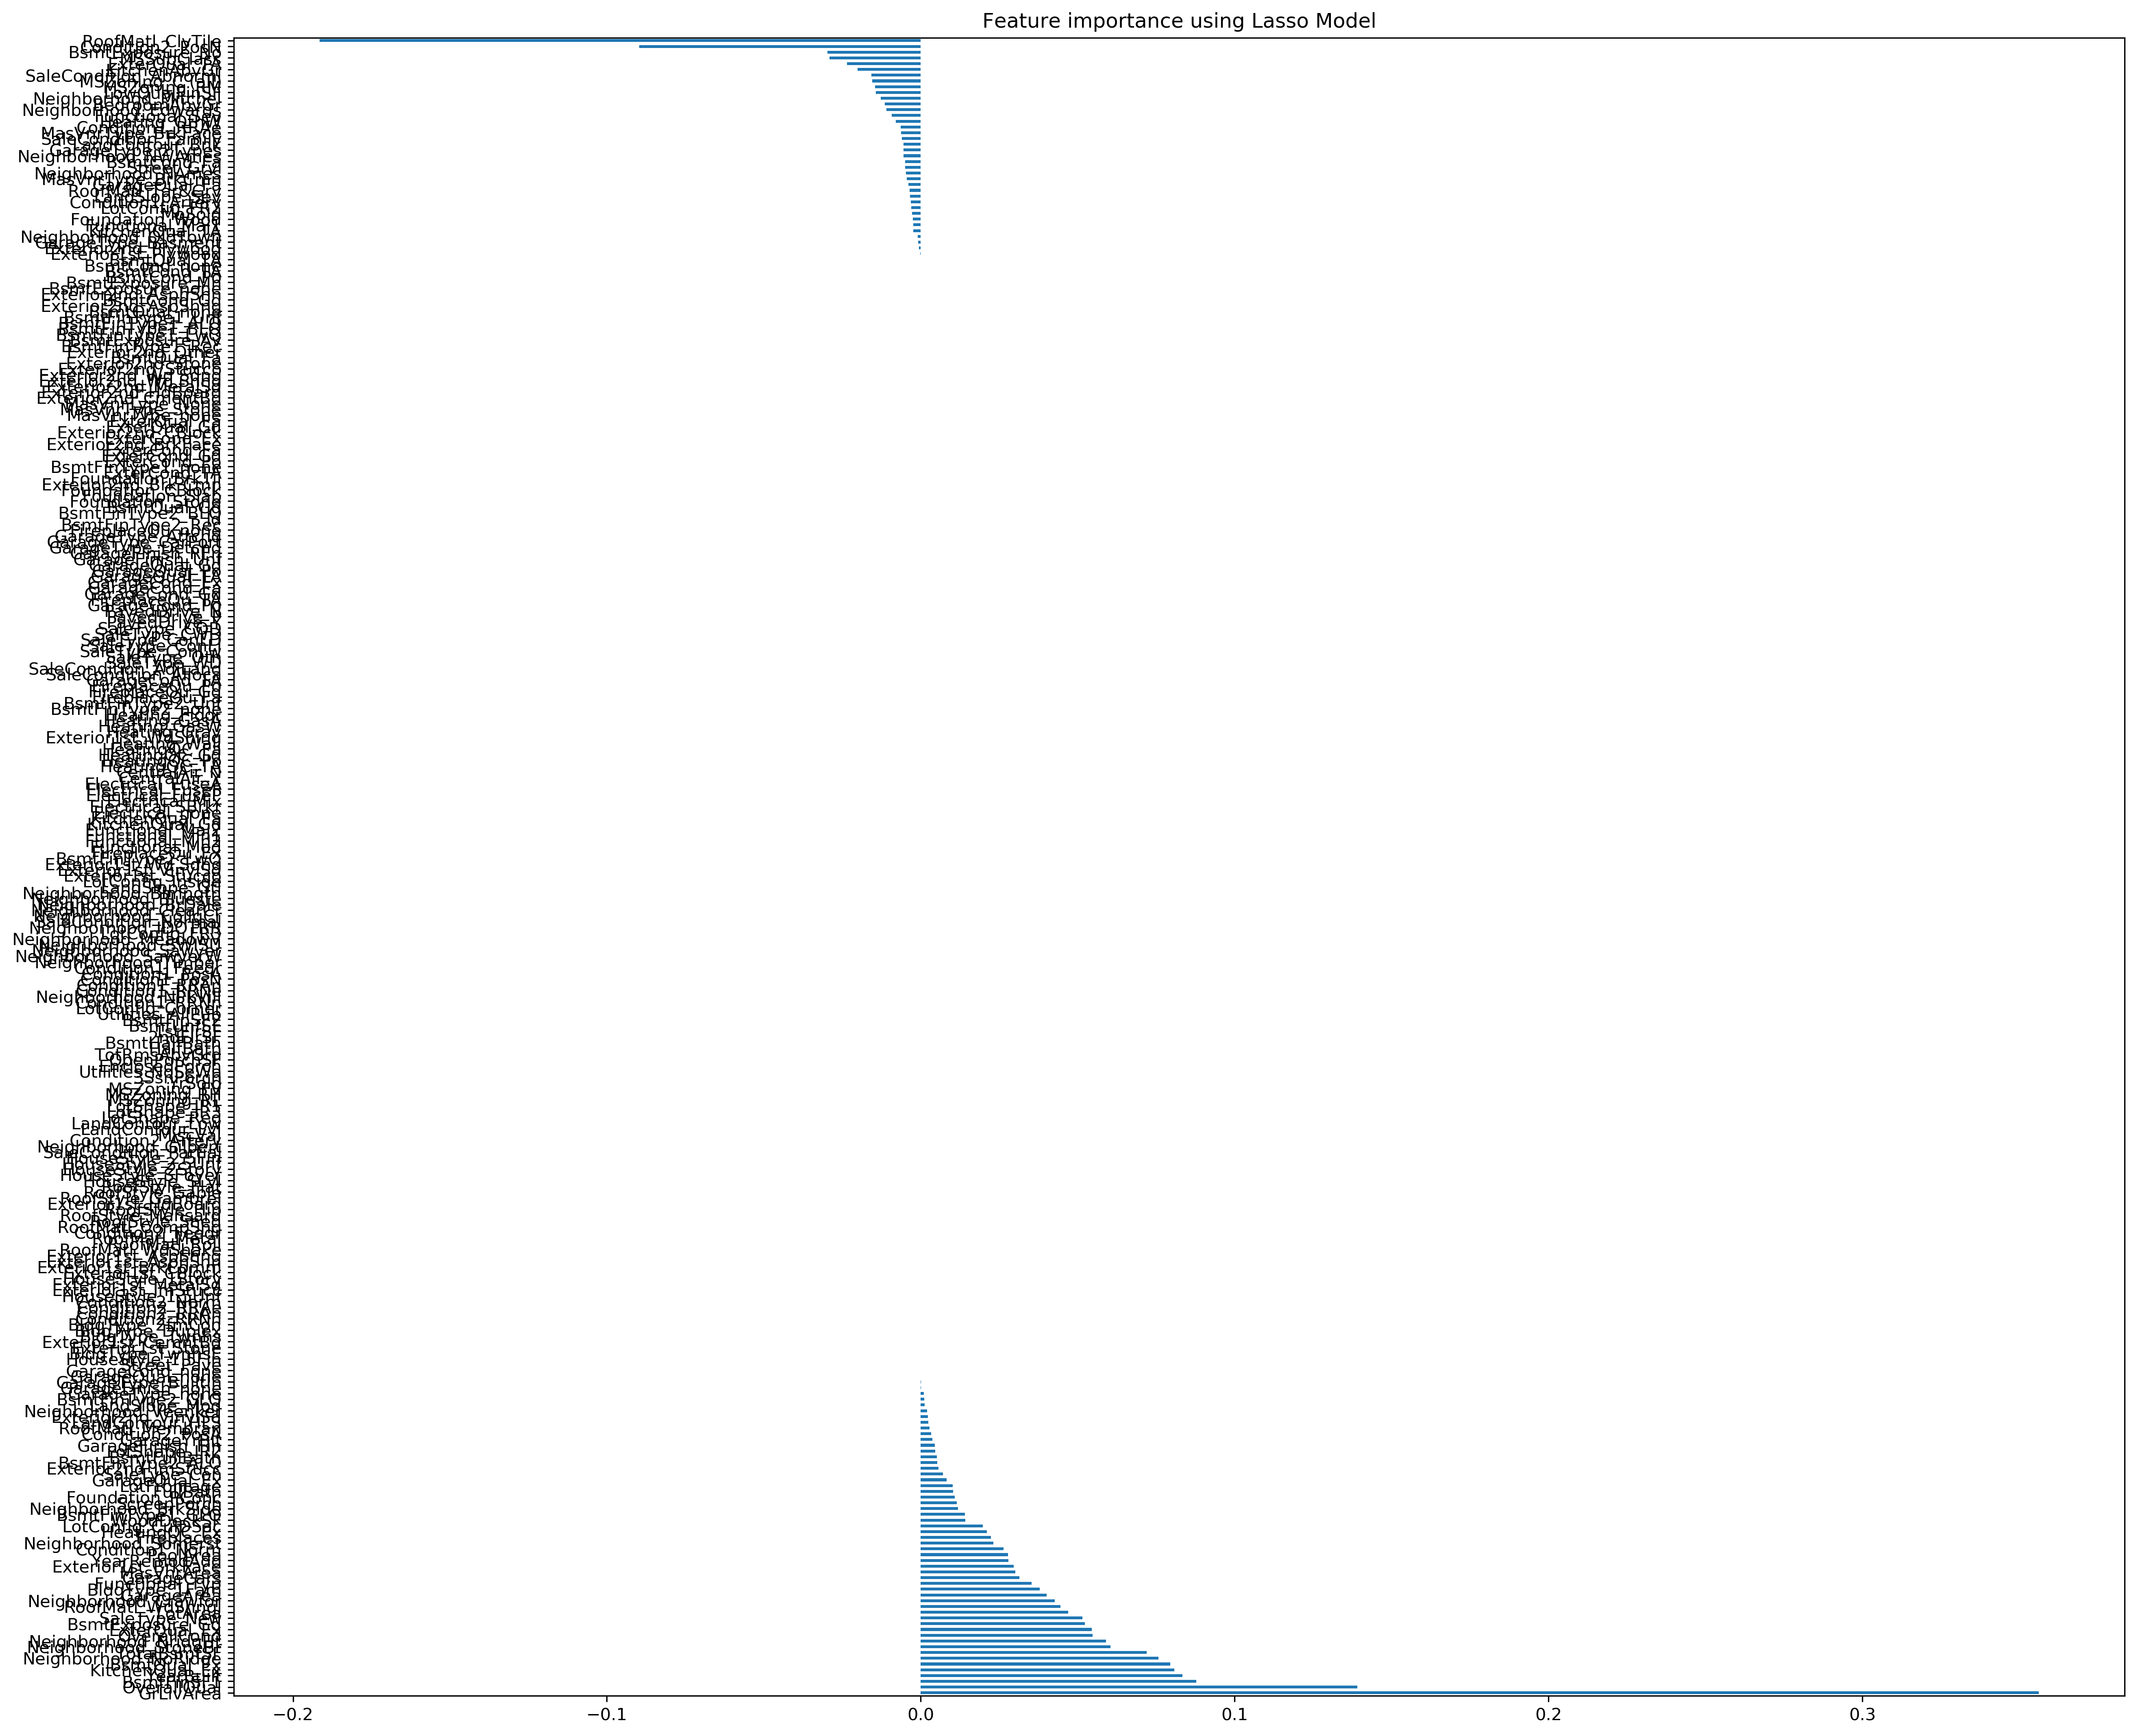

In [31]:
imp_coef = coef.sort_values(ascending= False)
figure(figsize= (20,18), dpi= 300)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [32]:
col= list(standard_df.drop('SalePrice', axis= 1).columns) 
FEATURES= list()
for i in range(len(coef)) :
    if coef[i] != 0:
        FEATURES.append(col[i])

In [33]:
FEATURES

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR2',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition2_PosA',
 'Condition2_PosN',
 'BldgType_1Fam',
 'RoofMatl_ClyTile

In [34]:
FEATURES= pd.DataFrame(standard_df, columns= FEATURES)

In [36]:
FEATURES.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,...,GarageFinish_Fin,GarageFinish_none,GarageQual_Ex,GarageQual_Fa,GarageQual_none,GarageCond_none,SaleType_Con,SaleType_New,SaleCondition_Abnorml,SaleCondition_Family
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.459303,...,-0.56364,-0.24236,-0.045376,-0.184376,-0.24236,-0.24236,-0.037037,-0.301962,-0.272616,-0.117851
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,0.466465,...,-0.56364,-0.24236,-0.045376,-0.184376,-0.24236,-0.24236,-0.037037,-0.301962,-0.272616,-0.117851
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.313369,...,-0.56364,-0.24236,-0.045376,-0.184376,-0.24236,-0.24236,-0.037037,-0.301962,-0.272616,-0.117851
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.687324,...,-0.56364,-0.24236,-0.045376,-0.184376,-0.24236,-0.24236,-0.037037,-0.301962,3.668167,-0.117851
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,0.199680,...,-0.56364,-0.24236,-0.045376,-0.184376,-0.24236,-0.24236,-0.037037,-0.301962,-0.272616,-0.117851


## As of now, I have filled in the Missing Values. 
## I performed basic feature engineering on categorical features.
## I have standardized my dataset.
## I performed feature selection using Lasso Model and now I have 97 features to train my model on.

# Using Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test= train_test_split(standard_df.drop('SalePrice', axis=1), Y, test_size= 0.3, random_state= 42)

In [47]:
rfr= RandomForestRegressor(n_estimators= 400).fit(x_train, y_train)

In [48]:
yHat= rfr.predict(x_test)

In [49]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [50]:
print('RMSLE:', rmsle(yHat, y_test))

RMSLE: 0.546106464839749


C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 200, )
gbr.fit(x_train, y_train)
yHat= gbr.predict(x_test)
print('RMSLE:', rmsle(yHat, y_test))
print('Feature Importances', gbr.feature_importances_)

RMSLE: 0.5996976656156405
Feature Importances [7.72353912e-05 2.73309269e-04 5.27570525e-04 8.98136360e-03
 5.48241083e-01 6.91387802e-04 1.85856457e-02 1.02237822e-02
 1.11174868e-04 3.22010780e-02 9.40705293e-04 1.13475861e-05
 3.35885418e-02 2.67128728e-02 4.41184479e-02 0.00000000e+00
 1.48899094e-01 0.00000000e+00 0.00000000e+00 2.10976552e-03
 5.87764564e-04 0.00000000e+00 6.15387472e-04 2.22620429e-03
 4.99811161e-03 2.42551197e-04 5.10552613e-02 1.31825371e-03
 4.94995148e-05 1.73057130e-03 0.00000000e+00 0.00000000e+00
 3.56951214e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00583286e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.94304002e-04 2.87700981e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.89614567e-05 0.00000000e+00
 8.07479227e-04 0.00000000e+00 0.00000000e+00 2.90454744e-04
 0.00000000e+00 0.00000000e+00 1.18229990e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.000000

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
test_df= pd.read_csv('Data/test.csv')

In [97]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [98]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [99]:
test_df= test_df.drop(['PoolQC','MiscFeature','Alley','Fence'], axis= 1)

In [100]:
misVal= list()
for col in test_df.columns:
    if test_df[col].isna().sum() > 0:
        misVal.append(col)

In [101]:
misVal

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [102]:
test_df[misVal].dtypes

MSZoning         object
LotFrontage     float64
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
SaleType         object
dtype: object

In [103]:
missing_Num= test_df[misVal].select_dtypes(include= 'float')
missing_Obj= test_df[misVal].select_dtypes(include= 'object')

In [104]:
test_df[missing_Num.columns]= test_df[missing_Num.columns].fillna(test_df[missing_Num.columns].mean())

In [105]:
test_df[missing_Obj.columns]= test_df[missing_Obj.columns].fillna('none')

In [106]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

In [107]:
object_Val= test_df.select_dtypes(include= 'object').columns

In [108]:
for val in object_Val:
    test_df= pd.get_dummies(test_df, columns=[val])

In [111]:
test_df.isna().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
                        ..
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_Po            0
GarageQual_TA            0
GarageQual_none          0
GarageCond_Ex            0
G

In [112]:
scaler.fit(test_df)
standard_test=scaler.transform(test_df)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [113]:
standard_test= pd.DataFrame(standard_test, columns= test_df.columns)

In [114]:
standard_test.head()
standard_test.shape
standard_test.isna().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
                        ..
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_Po            0
GarageQual_TA            0
GarageQual_none          0
GarageCond_Ex            0
G

In [118]:
col= list(standard_df.columns) 
FEATURES= list()
for i in range(len(coef)) :
    if coef[i] != 0:
        FEATURES.append(col[i])

In [116]:
coef.shape

(288,)

In [120]:
TEST_FEATURES= pd.DataFrame(standard_test, columns= FEATURES)

In [121]:
TEST_FEATURES.head()
TEST_FEATURES.isna().sum()

MSSubClass                 0
LotFrontage                0
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 0
BsmtFinSF1                 0
TotalBsmtSF                0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
FullBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
Fireplaces                 0
GarageYrBlt                0
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
ScreenPorch                0
PoolArea                   0
MoSold                     0
SalePrice               1459
MSZoning_RL                0
MSZoning_RM                0
Street_Grvl                0
LotShape_IR1               0
LotShape_Reg               0
                        ... 
Foundation_Stone           0
Foundation_Wood            0
BsmtQual_Gd                0
BsmtQual_none 

In [102]:
salePrice= rfr.predict(TEST_FEATURES)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [75]:
submit= pd.DataFrame()
submit['Id']= test_df['Id']

In [76]:
submit.shape

(1459, 1)

In [77]:
salePrice.shape

(1460,)